## 7.2 Método de Euler

Vamos agora estudar a solução de equações diferenciais ordinárias da forma

$$ \frac{dy}{dx} = f(x,y) $$

usando um método numérico de _passo único_ em que obtemos um processo iterativo para obter a solução para cada ponto $y_{i+1}$ a partir de um ponto $y_i$ conhecido. Fazemos isso considerando a derivada no ponto $x_i$ para obter o valor da função no ponto $x_{i+1}$ em que o tamanho de cada _passo_ é dado por $h = x_{i+1} - x_i$. Matemativamente, escrevemos

$$ y_{i+1} = y_i + \phi h$$

Assim, a estimativa da inclinação	é usada para extrapolar de um valor antigo $y_i$ para um valor novo $y_{i+1}$ em uma distância $h$. 


<img src="https://raw.githubusercontent.com/tiagoburiol/metodos_numericos_em_python/refs/heads/main/7_EQUACOES_DIFERENCIAIS_ORDINARIAS/imagens/euler_fig01.png" width="400">

A inclinação no início do intervalo é tomada como uma aproximação da inclinação média em todo o intervalo, com isso um erro é inserido. Em geral, quanto maior o tamanho do passo, maior é o erro nessa apoximação.

<img src="https://raw.githubusercontent.com/tiagoburiol/metodos_numericos_em_python/refs/heads/main/7_EQUACOES_DIFERENCIAIS_ORDINARIAS/imagens/euler_fig02.png" width="400">

No método de Euler a inclinação é tomada como sendo a derivada primeira da função $f(x,y)$, ou seja, considerando que $\frac{dy}{dx} = f(x,y)$, escrevemos

$$ y_{i+1} = y_i + f(x_i, y_{i}) h$$

Assim, a partir de um valor inicial $y_0$ conhecido obtemos estimativas para os valores subsequentes $y_1, y_2, y_3, ...$ da função.

Esse método também é chamado de método de _Euler-Cauchy_ ou _ponto-inclinação_.

**Exemplo 7.2.1:** Use o método de Euler para integrar numericamente a equação:

$$ \frac{dy}{dx} = -2x^3+12x^2-20x+8.5$$

de $x = 0$ a $x = 4$ com um tamanho de passo de $0.5$. A condição inicial em $x = 0$ é $y = 1$. 

A solução exata é dada por $y = -5.x^4+4x^3-10x^2+8.5x+1$.



*Solução:* Com um passo $h=0.5$, temos $x_0 = 0.0$, $x_1 = 0.5$, $x_2 = 1.0$, $x_3 = 1.5$, ..., $x_8=4.0$. Assim, a partir da equação 

$$ y_{i+1} = y_i + f(x_i, y_{i}) h$$

com

$$f(x,y)= \frac{dy}{dx} = -2x^3+12x^2-20x+8.5$$

e sabendo que em $x_0 = 0$ temos $y_0 = 1$ obtemos os valores de $y_1, y_2, y_3, ..., y_8$ 

Vamos fazer isso computacionalmente, em Python.

pontos xi: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4. ]
pontos yi: [1.0, 5.25, 5.875, 5.125, 4.5, 4.75, 5.875, 7.125, 7.0]


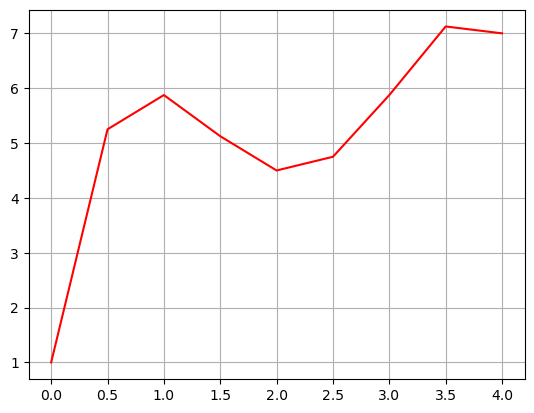

In [1]:

import numpy as np
import matplotlib.pyplot as plt

h = 0.5 #passo
x0 = 0.0
xn = 4.0

# criamos a lista com os pontos xi
X = np.arange(x0, xn+h, h) 
print ("pontos xi:", X)

# lista com y0, a ser preenchida pelos yi
Y = [1.0]                  

# entramos com f(x,y)
f = lambda x: -2*x**3 + 12*x**2 - 20*x + 8.5

# laço para ir calculando os yi e preenchendo a lista
for x in X[0:-1]:
    Y.append(Y[-1] + f(x)*h ) #Y[-1] é o último yi calculado
    
# imprime
print ("pontos yi:", Y)

# plota
plt.plot(X, Y, "r-")
plt.grid()
plt.show()

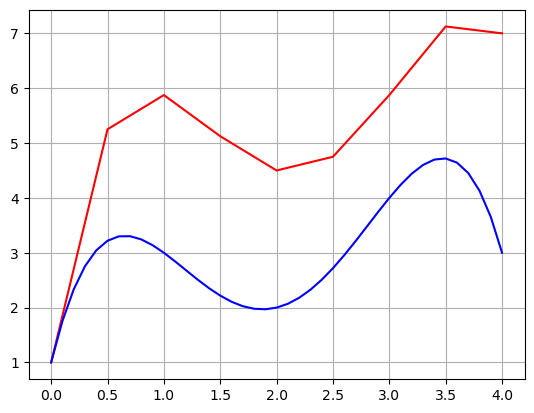

In [2]:
# plotando a solução exata para comparar
Xex = np.arange(0, 4.1, 0.1)
Yex = []
sol_ex = lambda x: -0.5*x**4 + 4*x**3 - 10*x**2 + 8.5*x + 1.0

for x in Xex:
    Yex.append(sol_ex(x))

plt.plot(X, Y, "r-", Xex, Yex, "b-")
plt.grid()
plt.show()

Nesse exemplo usamos um polinômio simples para a equação diferencial para facilitar a análise de erro a seguir. Logo,

$$\frac{dy}{dx} = f(x)$$

Um caso mais geral envolveria EDOs que dependam de $x$ e $y$, 

$$\frac{dy}{dx} = f(x,y)$$

Conforme progredirmos por esta parte do texto, nossos exemplos vão envolver cada vez mais EDOs que dependem tanto das variáveis dependentes quanto das independentes.


**Exemplo 7.2.2:** Use o método de Euler para integrar numericamente a equação:

$$ \frac{dy}{dx} = x-y+2$$

de $x = 0$ a $x = 1$ com um tamanho de passo de $0.25$. A condição inicial em $x = 0$ é $y = 2$. 

In [ ]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

h = 0.20 #passo
x0 = 0.0
xn = 1.0

# criamos a lista com os pontos xi
X = np.arange(x0, xn+h, h) 
print ("pontos xi:", X)

# lista com y0, a ser preenchida pelos yi
Y = [2.0]                  

# entramos com f(x,y)
f = lambda x,y: x-y+2

# laço para ir calculando os yi e preenchendo a lista
for n in range(len(X)-1):
    Y.append(Y[n] + f(X[n],Y[n])*h ) #Y[-1] é o último yi calculado
    
# imprime
print ("pontos yi:", Y)
s = lambda x: np.exp(-x) + x + 1
Xe = np.linspace(x0,xn, 20)
Ye = s(Xe)


# plota
plt.plot(X, Y, "r-", Xe, Ye, "b-")
plt.grid()
plt.show()

### Uma melhoria no método de Euler (método de Heun)

*Adaptado de [Chapra e Canalle (2016, p.651)](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/651).*

Uma melhoria nos resultados do método de Euler pode ser obtida melhorando a estimativa da inclinação $y_i'$. No método a inclinação em $y_i$ é tomada como sendo constante e igual a $dy/dx$ ao longo do intervalo. O método de Heus consiste em usar a inclinação média $\bar y'$ entre a inclinação nos dois extremos do intervalo, ou seja:

$$ \bar y'= \frac{y_i'+y_{i+1}'}{2}$$

em que $y_{i+1}'$ é estimada fazendo
$$
y_{i+1}^{\prime}=f\left(x_{i+1}, y_{i+1}^0\right) \quad \text{com} \quad y_{i+1}^0=y_i+f(x_i, y_i)h
$$

Aqui, $y_{i+1}^0$ é a primeira aproximação obtida pelo método de Euler, uma estimativa preditiva da inclinação, então, uma correção nessa aproximação é realizada usando a média das inclinações estimadas em $x_i$ e $x_{i+1}$. 

Essa inclinação média é, então, usada para extrapolar linearmente de $y_i$ a $y_{i+1}$

$$y_{i+1} = yi + \bar y'h$$

O método de Heun é uma abordagem do tipo *preditor-corretor* e pode ser usada repetidamente realizadno múltiplas iterações de correção da inclinação.

**Exemplo resolvido:** [(Chapra e Canale, 2016, p. 653)](https://integrada.minhabiblioteca.com.br/reader/books/9788580555691/pageid/653)

Use o método de Heun para integrar $y^{\prime}=4 e^{0.8 x}-0,5 y$ de $x=0$ a $x=4$ com tamanho do passo 1 . A condição inicial em $x=0$ é $y=2$.

In [ ]:
import numpy as np

#Método de Heun
def heun(a,b,h,f,n):
    yi = [2]
    xi = np.arange(a,b+2*h,h)   
    for i in range(len(xi)-1):
        err = 10.0
        dy = f(xi[i],yi[i])
        y = yi[i]+h*dy            #previsor (Euler)
        y_ant = y                 #guarda iteração anterior
        #n iterações
        for k in range(n):           #iterações 
            dy0 = f(xi[i+1],y)        #corretor
            y = yi[-1]+h*(dy+dy0)/2   #metodo de Heun
            err = abs(y-y_ant)/abs(y) #calcula o erro
            y_ant = y                 #atualiza iteração anterior
        yi.append(y)                        #inclui o resultado na lista
        print (xi[i], yi[i], err)  #imprime
    return (yi)


In [ ]:
a = 0.0                                #início
b = 4.0                                #fim
h = 1.0                                #passo
f = lambda x,y: 4*np.exp(0.8*x)-0.5*y  #função
yi = heun(a,b,h,f,15)

In [ ]:
# solução exata
xi = np.arange(a,b+h,h)
y_ex = (4/1.3)*(np.exp(0.8*xi)-np.exp(-0.5*xi))+2*np.exp(-0.5*xi)
print (y_ex)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(xi,y_ex, xi, yi[0:-1])

In [ ]:
a = 0.0                                #início
b = 4.0                                #fim
h = 1.0                                #passo
f = lambda x,y: 4*np.exp(0.8*x)-0.5*y  #função
heun(a,b,h,f,15)

### Exercícios

**1.** Considere o problema de valor inicial ([Boyce, 2020, p.54](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/28%5B%3Bvnd.vst.idref%3Dchapter02%5D!/4/804/22/1:0%5B%2Ct%5D))

$$
\frac{d y}{d t}=3-2 t-0,5 y, \quad y(0)=1 .
$$

Use o método de Euler com passos de tamanho $h = 0,2$ para encontrar valores aproximados da solução do problema de valor inicial em $t = 0,2$; $0,4$; $0,6$; $0,8$ e $1$. Compare-os com os valores correspondentes da solução exata $y=14-4 t-13 e^{-t / 2}$.

Em seguida, use diversos tamanhos de passos para calcular valores aproximados da solução para $0 ≤ t ≤ 5$. Compare os resultados calculados com os valores correspondentes da solução exata. Plote os gráficos.

**2.** Considere o problema de valor inicial ([Boyce, 2020, p.56](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/28%5B%3Bvnd.vst.idref%3Dchapter02%5D!/4/758/6%4052:53))

$$
\frac{d y}{d t}=4-t+2 y, \quad y(0)=1 .
$$

Use o método de Euler e o método de Heun (Euler melhorado), com o mesmo número de pontos na discretização, para encontrar valores aproximados da solução no intervalo $0 \leq t \leq 5$. Compare os resultados com os valores correspondentes da solução

$$
y=-\frac{7}{4}+\frac{1}{2} t+\frac{11}{4} e^{2 t} .
$$

Plote os gráficos.

**3.** Para cada um dos problemas a seguir, encontre a solução exata e soluções numéricas com três diferentes discretizações no intervalo $0,1 <= t <= 0.5$. Plote os gráficos  ([Boyce, 2020, p.57](https://integrada.minhabiblioteca.com.br/reader/books/9788521637134/epubcfi/6/28%5B%3Bvnd.vst.idref%3Dchapter02%5D!/4/850/2/1:7%5Blem%2Cas%5D)). 

$\begin{aligned} 
& \quad \quad (a) \quad y^{\prime}=3+t-y, \quad y(0)=1 \\
& \quad \quad (b) \quad y^{\prime}=2 y-1, \quad y(0)=1 \\ 
& \quad \quad (c) \quad y^{\prime}=0,5-t+2 y, \quad y(0)=1 \\ 
& \quad \quad (d) \quad y^{\prime}=3 \cos t-2 y, \quad y(0)=0
\end{aligned}$

**4.** Resolva o seguinte problema de valor inicial no intervalo de $t=0$ a $2$ em que $y(0)=1$. Mostre todos os seus resultados em um mesmo gráfico

$$
\frac{d y}{d t}=y t^2-1,1 y
$$

(a) Analiticamente.
(b) Método de Euler com $h=0,5$, $0,25$ e $0,1$.

**5.** Resolva o seguinte problema de valor inicial no intervalo de $t=0$ a $1$ usando um tamanbo de passo de $0,1$ , em que $y(0)=1$. Mostre todos os seus resultados cm um mesmo gráfico

$$
\frac{d y}{d t}=(1+4 t) \sqrt{y}
$$

(a) Analiticamente.
(b) Método de Euler.
(c) Método de Heun.

**6.** Use os métodos de (a) Euler e (b) Heun para resolver

$$
\frac{d^2 y}{d t^2}-0,5 t+y=0
$$

em que $y(0)=2$ e $y'(0)=0$. Resolva de $x=0$ a $4$ usando $h=0,1$. Compare os métodos fazendo os gráficos da solução.

